John Benton / 12-10-2019

# A Comparison of Bostons Neighborhoods:
## Gaining Insights on Major Real Estate Factors 

## Table of contents
* 1.[Introduction: Business Problem](#introduction)
* 2.[Data](#data)
* 3.[Methodology](#Methodology)
    - 3a.[Geo Spatial data: Getting our neighborhoods defined](#GeoSpatial)
    - 3b.[Boston Crime Data: Organize, Clean, Understand](#Crime)
    - 3c.[Boston Public School Data: A Web Scraping exercise](#School)
    - 3d.[Boston venues: Foursquare API calls to find the fun](#Venues)
    - 3e.[Collection: Joining of data](#joining)
    - 3f.[Machine Learning and visualization](#ml)
* 4.[Discussion](#discussion)
* 5.[Conclusion ](#Conclusion)



## 1. Introduction: Business Problem<a name="introduction"></a>

##### Background:

The real estate market has always been a bit frightening for first time home buyers. A home, for a large majority of people, will be the largest purchase of their entire life. For that reason, people rightfully want to get it right. There are a large list of factors that go into the consideration of purchasing a home. In larger cities you can expect some added pressure. Housing has becoming increasingly scarce and people are being forced to make quicker and quicker decisions in order to close the deal before someone steals it out from under them.

##### Problem/ Motivation:

The home buying process is complicated. The information required to make an informed decision on buying a home is vast. That information needs collected and decided upon quickly. Whether you are a person just trying to make an informed and quick decision, you are a person just unfamiliar with the area and need to have a better understanding of all the different neighborhoods, or you are the real estate agent just looking to boost efficiency, I hope to provide some extra information to aid in that process.

We are going to attempt to provide a grouping of neighborhood that have similar characteristics. This will hopefully allow people to look at neighborhoods they might not have considered.

## 2. Data <a name="data"></a>

Since our goal for this project is to group/cluster similar neighborhoods together, I wanted to collect the information that is most important to choosing a neighborhood to live in. For the purpose of this exercise we are going to be looking at crime data that is provided by data.boston.gov, We are going to be looking at high school rankings based on a USNews.com article, and we are going to be collecting a list of venues of things to do in each neighborhood. The list of venues are going to come from foursquare locations api.

The crime data and the high school rankings are going to be based from 2019 data, but have the potential to be expanded upon later. The venue data will be the most up to date data from December of 2019, since we are actually searching for the data around that time.

Boston Crime Data: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b

Boston Neighborhood Geo Spatial Data: https://data.boston.gov/dataset/boston-neighborhoods

Boston Highschool Rankings: https://www.usnews.com/education/best-high-schools/massachusetts/districts/boston-public-schools-111992

Venue data: https://foursquare.com/

##### explanation of data considerations:

I briefly wanted to address why these fields were chosen and other categories were left out. I feel like the categories listed above are going to be things that you will definitely experience in the neighborhood. Everyone one is concerned with safety. I feel like most people looking to live in a city would like ample things in the area to do, such as coffee shops or museums. I realize high school rankings might not apply to everyone, but I think a majority of people probably consider the education of the area for potential children.

I chose to leave out factors like commute time, because that can vary so much depending on the person applying. I also left out average real-estate prices because I wanted to try to allow for the clustering algorithm later to not be influenced by over inflated prices of an area. I wanted this data comparison to be strictly on what I would call "the merits" of the neighborhood. Just because an area is expensive doesn't inherently make it more fun, more safe, or more educated. 

I also chose to leave out things like elementary school and middle school rankings for simplicity. I also didn't want to add to many similar categories at the risk of adding noise. I know early education is important, but for the first pass at this data i'm going to only consider high school rankings.

## 3. Methodology <a name="Methodology"></a>

#### 3a. Geo Spatial data: Getting our neighborhoods defined<a name="GeoSpatial"></a>

Since all of this data hinges around the neighborhoods of Boston, it only makes sense than for us to define the neighborhoods and their parameters. So we are going to import the spatial coordinates of the neighborhoods from https://data.boston.gov/dataset/boston-neighborhoods and map these to over top of a folium map. 

In [1440]:
#A collection of common libraries to allow us to perform certain functions 
import pandas as pd
import numpy as np
import folium
import json
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape

In [1441]:
#Collecting and previewing the GeoSpatial data
boston_spatial_data = gpd.read_file('Boston_Neighborhoods.geojson')
boston_spatial_data

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05219 42.368..."
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


In [1444]:
boston_map = folium.Map(location=[42.329143, -71.076449], zoom_start=12)
boston_map.choropleth(
    geo_data=boston_spatial_data
)

# display map
boston_map

Now that we have all of the neighborhoods of Boston mapped out. We are going to begin collecting various points of data. We are going to start by creating a data frame from all of the Boston crime data and cleaning it to suit our needs.

#### 3b. Boston Crime Data: Organize, Clean, Understand<a name="Crime"></a>

In [1232]:
bcd_df = pd.read_csv('Boston_Crime_Data.csv')
bcd_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [1233]:
bcd_df.shape

(444500, 17)

Now that we have all of the Boston crime data, we are going to filter it down to the most recent year. This could potentially be improved to look at a longer range of data or perhaps the deltas in time, but for now we are going to examine 2019 data.

In [1234]:
bcd_df = bcd_df[bcd_df['YEAR'] == 2019]
bcd_df.shape

(91247, 17)

You can see based on the rows of 444500 from the first set, to the 91247 rows of the second set, that we have reduced the data set considerably. Now that we have the 2019 data we want to make sure we don't have null entries. For the purposes of this project we can't have null entires in the  "Lat" or "Long".

Since we are eventually going to map this data to our neighborhoods, we can't do that without the lat,long coordinates. Therefore we are going to remove them. In an ideal world we would use an API like the google one to take the street address that was provided to transform that into coordinates that we could eventually map to a neighborhood later. However, for the purposes of this course and this being a learning exercise I didn't feel comfortable sign up for any paid services.

In [1238]:
#This will remove our "TESTTEST2" row
bcd_df = bcd_df[bcd_df['Lat'].notnull()]
bcd_df.shape

(68913, 17)

In [1236]:
bcd_df = bcd_df[bcd_df['Long'].notnull()]
bcd_df.shape

(68913, 17)

In [1237]:
#Checking for Incidents like "TESTTEST2". This looks for the "I" that precedes all incident numbers. 
#If the "I" is not there it adds the row to this new data frame and we can see this new data frame has no rows.
#So we can assert that all incident numbers are valid.
incident_scan = bcd_df[bcd_df['INCIDENT_NUMBER'].str.find('i') == -1]
incident_scan.shape

(68913, 17)

Now that we have trimmed the data down and checked it for nulls, we can extract the columns that are going to be useful to us later. Things like the actual incident number aren't going to be very meaningful in our results later. So we are only going to capture the "OFFENSE_DESCRIPTION", "Lat", "Long"

In [1239]:
#Creating column name for the neighborhood
columns = ['Neighborhood']

#adding only the columns from the previous data set that we are going to be interested in
bcd_df_reduced = bcd_df[['OFFENSE_DESCRIPTION', 'Lat', 'Long']]

#Creating the temp data frame of the Neighborhood
df_temp = pd.DataFrame(index=bcd_df_reduced.index, columns=columns)

#Joining that temp data frame with the now reduced boston crime data
bcd_df_reduced = bcd_df_reduced.join(df_temp)
bcd_df_reduced.head()

,OFFENSE_DESCRIPTION,Lat,Long,Neighborhood
6,AUTO THEFT,42.259518,-71.121563,NaN
7,AUTO THEFT,42.262092,-71.116710,NaN
8,AUTO THEFT - LEASED/RENTED VEHICLE,42.352375,-71.135096,NaN
9,AUTO THEFT,42.349476,-71.076402,NaN
10,AUTO THEFT - LEASED/RENTED VEHICLE,42.381846,-71.066551,NaN


In [1240]:
#checking to make sure we have the same number of rows plus our extra column
bcd_df_reduced.shape

(68913, 4)

In [1241]:
# check each polygon to see if it contains the point
for entry in bcd_df_reduced.iterrows():
    point = Point(entry[1]['Long'],entry[1]['Lat'])
    for neighborhood in boston_spatial_data.iterrows():
        polygon = shape(neighborhood[1]['geometry'])
        if polygon.contains(point):
            bcd_df_reduced.loc[entry[0],'Neighborhood'] = neighborhood[1]['Name']
            

In [1243]:
bcd_df_reduced.head()

,OFFENSE_DESCRIPTION,Lat,Long,Neighborhood
6,AUTO THEFT,42.259518,-71.121563,Hyde Park
7,AUTO THEFT,42.262092,-71.116710,Hyde Park
8,AUTO THEFT - LEASED/RENTED VEHICLE,42.352375,-71.135096,Allston
9,AUTO THEFT,42.349476,-71.076402,Back Bay
10,AUTO THEFT - LEASED/RENTED VEHICLE,42.381846,-71.066551,Charlestown


Now that we have looped over all of our rows and assigned a neighborhood to them, we can continue getting the rest of our data.

First we are going to take our now cleaned crime data and get a count of crimes in each neighborhood. This will be the start of a neighborhood data set from which we will eventually add data too and map over our map of Boston.

In [1244]:
neighborhood_df = bcd_df_reduced
neighborhood_df = neighborhood_df.set_index('Neighborhood')
neighborhood_df = pd.DataFrame(neighborhood_df.groupby('Neighborhood')['OFFENSE_DESCRIPTION'].count())
neighborhood_df.rename(columns={'OFFENSE_DESCRIPTION': 'Count of Offenses'}, inplace = True)
neighborhood_df


,Count of Offenses
Neighborhood,
Allston,1817
Back Bay,2715
Bay Village,151
Beacon Hill,560
Brighton,2474
Charlestown,1312
Chinatown,566
Dorchester,16642
Downtown,4857


#### 3c. Boston Public School Data: A Web Scraping exercise<a name="School"></a>

For this portion of the project we are going to need to do a bit more work for our data. The Boston crime data was nicely formatted for the most part and was able to just be downloaded from the city governments website. However with the public school data, the metrics I was looking for weren't really available. So we are turning to a US News article that ranks the schools. 

It provides a lot of different metrics on each school, but we are going to just focus on college readiness, graduation rates, and enrollment. For a more verbose look at the neighborhoods, you could dig a bit deeper on the different metrics of each school.

So from this article we are going to be scraping the data about these schools

In [1445]:
from bs4 import BeautifulSoup
import requests

In [1536]:
#Grabing the actual source code from the US News article
agent = {"User-Agent":"Mozilla/5.0"}
boston_public_source1 = requests.get('https://www.usnews.com/education/best-high-schools/massachusetts/districts/boston-public-schools-111992', headers=agent).text
boston_public_source2 = requests.get('https://www.usnews.com/education/best-high-schools/massachusetts/districts/boston-public-schools-111992?page=2', headers=agent).text

boston_public_soup1 = BeautifulSoup(boston_public_source1, 'lxml')
boston_public_soup2 = BeautifulSoup(boston_public_source2, 'lxml')

In [1571]:
#Creating a data frame from which we will append rows to as we collect data
school_dataFrame = pd.DataFrame({'Neighborhood':['1'], 'School Name':['2'], 'Graduation Rate %':['3'], 'College Readiness':['4'], 'Enrollment':['5']})
school_dataFrame.head()                                 

,Neighborhood,School Name,Graduation Rate %,College Readiness,Enrollment
0,1,2,3,4,5


In [1572]:
school_soup1 = boston_public_soup1.find(id = 'search-app-matches-region')
school_soup1 = school_soup1.find(class_='search-content')


school_soup2 = boston_public_soup2.find(id = 'search-app-matches-region')
school_soup2 = school_soup2.find(class_='search-content')

In [1539]:
#Looping over all cards of data for each school
def schoolDataScrape(school_soup, school_dataFrame_pass):
    for school_card in school_soup.find_all(class_= 'search-result flex-row'):
        #Creating a temp Data Frame to eventually append to the real one
        school_dataFrame_temp = pd.DataFrame({'Neighborhood':['0'], 'School Name':['0'], 'Graduation Rate %':['0'], 'College Readiness':['0'],  'Enrollment':['5']})

        #Getting school name and neighborhood if its listed and assigning it to the temp DF
        school_name = school_card.find(class_ = 'block-tight').text.replace('\n', '')
        school_neighborhood = school_card.find(class_ = 'text-small').text.split('|')[0].replace('\n', '')
        
        #this is stripping of the first eight spaces of all entries to fit better with our data in the future
        school_neighborhood  = school_neighborhood[8:]

        
        school_dataFrame_temp.loc[0,'Neighborhood'] = school_neighborhood
        school_dataFrame_temp.loc[0,'School Name'] = school_name

        school_scores = school_card.find(class_ = 'search-result-panel').div.div.p.find_all(class_ ='display-block-for-small block-tight text-normal')#.span.text

        #Now we are going to loop over the results section of each card
        col = 2
        for score in school_scores:
            school_dataFrame_temp.iloc[0,col] = score.text
            col = col+1

        school_dataFrame_pass = school_dataFrame_pass.append(school_dataFrame_temp)
    
    return school_dataFrame_pass


Now we are going to run the same loop only for the other URL that finishes the data set. I realize that a selenium based crawling method might normally be used, but because of the coding of this website it didn't seem to function properly. I realized it simply linked to an extension URL that I could operate on independently. So that is the method we are going to use.

In [1573]:
school_dataFrame = schoolDataScrape(school_soup1,school_dataFrame)
school_dataFrame = schoolDataScrape(school_soup2,school_dataFrame)

school_dataFrame.head()

,Neighborhood,School Name,Graduation Rate %,College Readiness,Enrollment
0,1,2,3,4,5
0,"Boston, MA",Boston Latin School,97%,95.3,"1,630"
0,"Dorchester, MA",Boston Latin Academy,95%,64.0,"1,167"
0,"Roxbury, MA",John D. O'Bryant School of Mathematics and Sci...,97%,53.2,"1,129"
0,"Hyde Park, MA",New Mission High School,98%,31.3,320


In [1574]:
#Cleaning up index and the extra row that was created
school_dataFrame.reset_index(inplace = True)
school_dataFrame.drop('index', axis=1, inplace = True)
school_dataFrame.drop([0], axis=0, inplace = True)

In [1575]:
school_dataFrame.head()

,Neighborhood,School Name,Graduation Rate %,College Readiness,Enrollment
1,"Boston, MA",Boston Latin School,97%,95.3,"1,630"
2,"Dorchester, MA",Boston Latin Academy,95%,64.0,"1,167"
3,"Roxbury, MA",John D. O'Bryant School of Mathematics and Sci...,97%,53.2,"1,129"
4,"Hyde Park, MA",New Mission High School,98%,31.3,320
5,"Boston, MA",Margarita Muniz Academy,73%,57.9,284


So initially I had planned to use the four square API to loop over all the data that didn't have an existing name in our neighborhoods list, get the coordinates, and map those coordinates to our geospatial data and over write it. However upon further examination of the data it seems there would only be six entries that would need to be replaced. So I'm going to manually look them up and replace them.

In [1576]:
#I just took individual coordinates that I searched on Google Maps and plugged them into the code I used earlier. 
#long,Lat      
point = Point(-71.073547,42.344172)
for neighborhood in boston_spatial_data.iterrows():
        polygon = shape(neighborhood[1]['geometry'])
        if polygon.contains(point):
            print(neighborhood[1]['Name'])

South End


In [1577]:
school_dataFrame.loc[1,'Neighborhood'] = 'Longwood, MA'
school_dataFrame.loc[5,'Neighborhood'] = 'Jamaica Plain, MA'
school_dataFrame.loc[7,'Neighborhood'] = 'Bay Village, MA'
school_dataFrame.loc[10,'Neighborhood'] = 'Dorchester, MA'
school_dataFrame.loc[12,'Neighborhood'] = 'Back Bay, MA'
school_dataFrame.loc[24,'Neighborhood'] = 'Jamaica Plain, MA'
school_dataFrame.loc[27,'Neighborhood'] = 'South End, MA'

In [1578]:
#Removing the MA clarification so we can eventually clean and join this data on the neighborhood index
school_dataFrame['Neighborhood'] = school_dataFrame.Neighborhood.str.replace(', MA', '', regex=True)

school_dataFrame

,Neighborhood,School Name,Graduation Rate %,College Readiness,Enrollment
1,Longwood,Boston Latin School,97%,95.3,"1,630"
2,Dorchester,Boston Latin Academy,95%,64.0,"1,167"
3,Roxbury,John D. O'Bryant School of Mathematics and Sci...,97%,53.2,"1,129"
4,Hyde Park,New Mission High School,98%,31.3,320
5,Jamaica Plain,Margarita Muniz Academy,73%,57.9,284
6,Hyde Park,Boston Community Leadership Academy,82%,39.9,496
7,Bay Village,Josiah Quincy Upper School,85%,34.1,218
8,Hyde Park,Another Course to College,79%,21.9,223
9,Dorchester,Techboston Academy,89%,16.5,585
10,Dorchester,Boston Arts Academy,90%,4.2,447


In [1580]:
#Removes all unwanted spaces from the end of our Neighborhood field
school_dataFrame['Neighborhood'] = school_dataFrame['Neighborhood'].str.rstrip(' ')
school_dataFrame.head()

,Neighborhood,School Name,Graduation Rate %,College Readiness,Enrollment
1,Longwood,Boston Latin School,97%,95.3,"1,630"
2,Dorchester,Boston Latin Academy,95%,64.0,"1,167"
3,Roxbury,John D. O'Bryant School of Mathematics and Sci...,97%,53.2,"1,129"
4,Hyde Park,New Mission High School,98%,31.3,320
5,Jamaica Plain,Margarita Muniz Academy,73%,57.9,284


Below we are going to be doing some formatting to get our results in an integer format and organized by the neighborhoods they are associated with.

In [1581]:
#setting the index to the neighborhoods like the crime data
school_dataFrame.set_index('Neighborhood', inplace=True)

In [1582]:
#removing string style elements so we can convert the numeric data into actual numeric data types
school_dataFrame['Graduation Rate %'] = school_dataFrame['Graduation Rate %'].str.replace('%','')
#Let it be noted that the conversion ot 0 from N/A could potentially not accurately reflect a school
#or neighborhood. However this was needed in order to aggregate our data down.
school_dataFrame['College Readiness'] = school_dataFrame['College Readiness'].str.replace('N/A','0')
school_dataFrame['Enrollment'] = school_dataFrame['Enrollment'].str.replace(',','')

In [1583]:
#converting data to numerics and dropping school name
school_numerics = school_dataFrame[['Graduation Rate %','College Readiness','Enrollment']].apply(pd.to_numeric)

In [1585]:
#averaging all results to obtain one number per neighborhood.
school_numerics = school_numerics.groupby('Neighborhood').agg(np.mean)

In [1594]:
school_numerics

,Graduation Rate %,College Readiness,Enrollment
Neighborhood,,,
Allston,44.000000,0.000000,33.000000
Back Bay,51.500000,0.000000,318.000000
Bay Village,85.000000,34.100000,218.000000
Brighton,70.000000,3.900000,461.000000
Charlestown,55.000000,20.900000,867.000000
Dorchester,69.444444,13.788889,428.222222
East Boston,75.000000,19.100000,1480.000000
Hyde Park,86.333333,31.033333,346.333333
Jamaica Plain,56.250000,17.000000,272.250000


I struggled how to best represent each neighborhood fairly. I did end up deciding on an average aggregation of the school data. I felt this was fair because, to my knowledge, you don't get to choose what school you attend if you live within a neighborhood. This is something though I'm aware that could be effecting results and am exploring how to improve. For now this is what i've settled on.

#### 3d. Boston venues: Foursquare API calls to find the fun<a name="Venues"></a>

Now we are on to our final large chunk of data. We are going to query against the Foursquare location data set in order to grab all of the various venues in Boston. Since there is no way to query all venues for a particular city, we need to be a little creative. 

Since each query only allows for a max return of 50 venues, we need to break out our queries. I've utilized a third party tool that allows you to draw a circle over top of a map. This provides its longitude and latitude coordinates and the size of the radius in meters and miles. I've used a series of circles that will cover the whole map of Boston. 

This will require some later data cleaning to remove duplicates of the overlapping areas, but it gives us a more comprehensive look at the city venue list. 

In [1367]:
#grabbing a JSON formatter to handle the queries
from pandas.io.json import json_normalize
import math

In [1773]:
#Credentials have been removed for sharing purposes
#Setting up foursquare credentials
CLIENT_ID = 'replace with your client id' # your Foursquare ID
CLIENT_SECRET = 'replace with your client secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: replace with your client id
CLIENT_SECRET:replace with your client secret


In [1322]:
#Latitude, Longitude, Radius
list_of_circles = [
    [42.365102,-71.055397,572.98],
    [42.363549,-71.065699,572.98],
    [42.357904,-71.052776,438.83],
    [42.357111,-71.060760,438.83],
    [42.358459,-71.069773,343.51],
    [42.352529,-71.056126,460.02],
    [42.351070,-71.067155,534.16],
    [42.353512,71.077669,534.16],
    [42.344758,-71.058062,625.96],
    [42.349537,-71.045237,625.96],
    [42.346014,-71.032207,625.96],
    [42.331295,-71.024654,1515.94],
    [42.373274,-71.029841, 1515.94],
    [42.390012,-71.004607,1515.94],
    [42.380502,-71.061255,1050.19],
    [42.348222,-71.101650,570.01],
    [42.348349,-71.129631,1198.46],
    [42.362557,-71.131691,1198.46],
    [42.351267,-71.155895,1198.46],
    [42.344915,-71.074802,774.73],
    [42.340347,-71.091110,774.73],
    [42.333876,-71.076690,774.73],
    [42.340728,-71.106560,774.73],
    [42.331465,-71.103469,774.73],
    [42.336668,-71.061584,774.73],
    [42.328038,-71.089393,774.73],
    [42.329815,-71.049911,774.73],
    [42.324802,-71.065876,774.73],
    [42.314775,-71.048194,1276.36],
    [42.295604,-71.055840,1276.36],
    [42.282398,-71.076439,1276.36],
    [42.273634,-71.104530,1276.36],
    [42.253689,-71.119527,1587.54],
    [42.230557,-71.132792,1587.54],
    [42.252670,-71.144808,1587.54],
    [42.277569,-71.160258,1587.54],
    [42.278331,-71.132449,1587.54],
    [42.294587,-71.123865,1587.54],
    [42.295094,-71.097430,1587.54],
    [42.310075,-71.075800,1898.37],
    [42.315915,-71.109789,1474.56],
    [42.324800,-70.967783,4809.95],
    [42.347863,-71.086208,352.48],
    [42.348751,-71.080543,352.48],
    [42.349988,-71.074106,352.48],
    [42.349735,-71.063791,313.64],
    [42.351067,-71.061002,193.60],
    [42.370023,-71.034079,878.35],
    [42.377755,-71.033791,878.35],
    [42.387138,-70.990275,2092.15],
    [42.364459,-71.060996,249.58],
    [42.360812,-71.063496,249.58],
    [42.362350,-71.069075,249.58],
    [42.373975,-71.059865,454.28],
    [42.376585,-71.052318,454.28],
    [42.380822,-71.059822,454.28],
    [42.378286,-71.068362,454.28],
    [42.350814,-71.130960,454.28]   
]

In [1323]:
url_list = []
for circle in list_of_circles:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, circle[0], circle[1], VERSION, circle[2], LIMIT)
    url_list.append(url)
len(url_list)

58

In [1287]:
results_list = []
for url in url_list:
    request_from_url = requests.get(url).json()
    results_list.append(request_from_url)

len(results_list)

58

The above three section of code defines the center and radius of various circles that cover the shape of Boston. Then once we have our shapes, we format a url that will query the foursquare api. We collect those various urls and make a list of that. From that list, we then take the results from the queries of those various urls and make another list.Then we are going to feed those results into the next section of code to make a data frame we can clean and sort.

In [1771]:
# assign relevant part of JSON to venues
result = results_list[0]
venues = result['response']['venues']

# transform venues into a data frame
venue_dataframe = json_normalize(venues)

#this removes the first entry we used to create the data frame, that is so we don't re-append 
#it when we go through our loop of results
results_list.pop(0)

for rslt in results_list:
    venues_temp = rslt['response']['venues']

    dataframe = json_normalize(venues_temp)
    venue_dataframe = venue_dataframe.append(dataframe, sort=False)
    
venue_dataframe['categories'].shape

(2744,)

In [1326]:
venue_dataframe.index = range(venue_dataframe.shape[0])
venue_dataframe.index

RangeIndex(start=0, stop=2794, step=1)

In [1327]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in venue_dataframe.columns if col.startswith('location.')] + ['id']
venue_dataframe_filtered = venue_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
venue_dataframe_filtered['categories'] = venue_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
venue_dataframe_filtered.columns = [column.split('.')[-1] for column in venue_dataframe_filtered.columns]

venue_dataframe_filtered.shape

(2794, 16)

There is a concern that when making these circles that there is going to be sections that over lap and report the same venue. So here we are going to drop all duplicate venue names and report the new shape.

In [1328]:
venue_dataframe_filtered.drop_duplicates(subset ="name", keep = False, inplace = True) 
venue_dataframe_filtered.shape

(2491, 16)

Here you can see that we have only lost around a few hundred rows due to duplication.

In [1329]:
#Keeping only the columns that we care about
#For our purposes we are just trying to see the number and type of amenities.
#We just want to see what a neighborhood has to offer, not necisarilly the quality right away.
venue_dataframe_filtered = venue_dataframe_filtered[['categories', 'lat', 'lng']]
venue_dataframe_filtered.head()

,categories,lat,lng
0,Other Great Outdoors,42.364537,-71.066308
1,Dentist's Office,42.363713,-71.065374
2,Church,42.363131,-71.065304
3,Pool,42.363163,-71.064814
4,Office,42.363739,-71.066325


Now that we have the categories we need to find what neighborhood each of these belongs to. Fortunately we have already written code above to determine what neighborhood geo-coordinates fall in.

In [1330]:
#Creating column name for the neighborhood
columns = ['Neighborhood']


#Creating the temp data frame of the Neighborhood
df_temp = pd.DataFrame(columns=columns)

#Joining that temp data frame with the now reduced venue data
venue_dataframe_reduced = venue_dataframe_filtered.join(df_temp)
venue_dataframe_reduced.head()

,categories,lat,lng,Neighborhood
0,Other Great Outdoors,42.364537,-71.066308,NaN
1,Dentist's Office,42.363713,-71.065374,NaN
2,Church,42.363131,-71.065304,NaN
3,Pool,42.363163,-71.064814,NaN
4,Office,42.363739,-71.066325,NaN


In [1332]:
# check each polygon to see if it contains the point
for venue in venue_dataframe_reduced.iterrows():
    point = Point(venue[1]['lng'],venue[1]['lat'])
    for neighborhood in boston_spatial_data.iterrows():
        polygon = shape(neighborhood[1]['geometry'])
        if polygon.contains(point):
            venue_dataframe_reduced.loc[venue[0],'Neighborhood'] = neighborhood[1]['Name']


In [1333]:
venue_dataframe_reduced['Neighborhood'].value_counts()

Dorchester                 240
Downtown                   211
South Boston               174
East Boston                171
Charlestown                171
West End                   147
Back Bay                   143
Allston                    105
South Boston Waterfront    105
Hyde Park                  103
Roxbury                     96
Fenway                      94
Jamaica Plain               86
Beacon Hill                 77
South End                   73
Chinatown                   66
Roslindale                  61
Brighton                    47
Longwood                    45
Mission Hill                45
West Roxbury                43
Mattapan                    30
Bay Village                 12
Harbor Islands               8
Name: Neighborhood, dtype: int64

In [1334]:
pd.options.display.max_rows = 999
venue_dataframe_filtered['categories'].value_counts()

Office                                      82
Residential Building (Apartment / Condo)    73
Salon / Barbershop                          71
Building                                    44
Park                                        44
Bar                                         43
Hospital                                    42
Pizza Place                                 32
Church                                      32
Doctor's Office                             32
Bus Line                                    28
American Restaurant                         28
Nail Salon                                  27
Food                                        26
Liquor Store                                26
Automotive Shop                             26
Chinese Restaurant                          26
Food Truck                                  24
Café                                        23
Coffee Shop                                 23
Convenience Store                           22
Bakery       

So as you can see above there are a list of the different categories. I think trying to do a KMEANS clustering on that many columns could have negative results on the end goal of an accurate clustering. So I painfully went through this whole list and tried grabbing the most high value results from the above list. I did eventually stop categorizing as each entry towards the end only contained 1 entry per unique name. I felt that the list I had compiled would most likely give a pretty good picture of how a neighborhood could look. 

This list is already not exhaustive based on the way I had to retrieve the venue data, but I think it gives a decently detailed look into the types of things that could be in each neighborhood. Below is the list I compiled that I'll be using to further categorize our data frame.

In [1335]:
high_lvl_categories_dic = {
    'shopping(food)':[
        'Liquor Store',
        'Convenience Store',
        'Grocery Store',
        'Deli / Bodega',
        'Butcher',
        'Supermarket',
        'Market',
        'Farmers Market',
        'Fruit & Vegetable Store'],
 
    'shopping(goods)':[
        'Cosmetics Shop',
        'Hardware Store',
        'Flower Shop',
        'Antique Shop',
        'Miscellaneous Shop',
        'Clothing Store',
        'Pet Store',
        'Auto Dealership',
        'Furniture / Home Store',
        'Jewelry Store',
        'Boutique',
        'Electronics Store',
        'Smoke Shop',
        'Gift Shop',
        'Women\'s Store',
        'Shoe Store',
        'Gourmet Shop',
        'Bookstore',
        'Bike Shop',
        'Men\'s Store',
        'Optical Shop'],
            
    'pertaining to transit':[
        'Bus Line',
        'Parking',
        'Bus Stop',
        'Metro Station',
        'Harbor / Marina',
        'Gas Station',
        'Bus Station',
        'Boat or Ferry',
        'Rental Car Location',
        'Bike Rental / Bike Share',
        'Train Station',
        'Light Rail Station',
        'Airport Terminal'],
    
    'medical':[
        'Doctor\'s Office',
        'Hospital',
        'Medical Center',
        'Dentist\'s Office',
        'Veterinarian',
        'Chiropractor',
        'Pharmacy',
        'Medical Lab',
        'Mental Health Office'],
    
    'services':[
        'Salon / Barbershop',
        'Gym',
        'Laundry Service',
        'Automotive Shop',
        'Nail Salon',
        'Gym / Fitness Center',
        'Coworking Space',
        'Dance Studio',
        'Martial Arts Dojo',
        'Spa',
        'Bank',
        'Daycare',
        'Health & Beauty Service',
        'Cycle Studio',
        'Credit Union',
        'Financial or Legal Service',
        'Laundromat',
        'Rental Service',
        'Library',
        'Gymnastics Gym'],
    
    'night life':[
        'Bar',
        'Speakeasy',
        'Lounge',
        'Pub',
        'Other Nightlife',
        'Cocktail Bar',
        'Strip Club',
        'Dive Bar',
        'Hotel Bar',
        'Nightclub',
        'Nightlife Spot',
        'Irish Pub'],
    
    'food(Restaurant)':[
        'Pizza Place',
        'Italian Restaurant',
        'American Restaurant',
        'Food',
        'Chinese Restaurant',
        'Restaurant',
        'Sandwich Place',
        'Seafood Restaurant',
        'Asian Restaurant',
        'Caribbean Restaurant',
        'Beer Garden',
        'Mexican Restaurant',
        'Indian Restaurant',
        'BBQ Joint',
        'Food Court',
        'Thai Restaurant',
        'New American Restaurant',
        'Burrito Place',
        'Breakfast Spot',
        'Mediterranean Restaurant',
        'Spanish Restaurant',
        'Brewery',
        'Salad Place',
        'Diner',
        'Wings Joint',
        'Halal Restaurant',
        'French Restaurant',
        'Theme Restaurant',
        'Middle Eastern Restaurant',
        'Southern / Soul Food Restaurant',
        'Ramen Restaurant',
        'Burger Joint',
        'Japanese Restaurant',
        'Latin American Restaurant',
        'Dumpling Restaurant',
        'Sushi Restaurant',
        'Tapas Restaurant',
        'Hawaiian Restaurant',
        'Cantonese Restaurant',
        'Cuban Restaurant',
        'Brazilian Restaurant',
        'Bagel Shop'],
    
    'food(sweets and coffee)':[
        'Coffee Shop',
        'Café',
        'Bakery',
        'Ice Cream Shop',
        'Dessert Shop',
        'Juice Bar',
        'Snack Place',
        'Cupcake Shop',
        'Candy Store',
        'Tea Room'],
    
    'Fun Activities/ Venues':[
        'Park',
        'Beach',
        'Other Great Outdoors',
        'Plaza',
        'General Entertainment',
        'Dog Run',
        'Theater',
        'Trail',
        'Pool',
        'Baseball Field',
        'Scenic Lookout',
        'Soccer Field',
        'Community Center',
        'Tennis Court',
        'Art Museum',
        'Yoga Studio',
        'Outdoors & Recreation',
        'Monument / Landmark',
        'Athletics & Sports',
        'Art Gallery',
        'Event Space',
        'Arcade',
        'Comedy Club',
        'History Museum',
        'Music Venue',
        'Garden',
        'Gaming Cafe',
        'Theme Park',
        'Water Park',
        'Museum',
        'Movie Theater',
        'Indie Movie Theater',
        'Sculpture Garden',
        'Ski Area',
        'Pier',
        'Track',
        'Lake',
        'Baseball Stadium',
        'State / Provincial Park',
        'Basketball Court',
        'Piano Bar',
        'Jazz Club',
        'Skating Rink',
        'Skate Park',
        'Rock Club'],
    
    'religion':[
        'Church',
        'Mosque',
        'Kingdom Hall',]

}

In [1336]:
#Creating column name for the neighborhood
columns = ['High Level Categories']

#Creating the temp data frame of the Neighborhood
df_temp = pd.DataFrame(columns=columns)

#Joining that temp data frame with the now reduced boston venue data
venue_dataframe_reduced = venue_dataframe_reduced.join(df_temp)
venue_dataframe_reduced.head()

,categories,lat,lng,Neighborhood,High Level Categories
0,Other Great Outdoors,42.364537,-71.066308,West End,NaN
1,Dentist's Office,42.363713,-71.065374,West End,NaN
2,Church,42.363131,-71.065304,West End,NaN
3,Pool,42.363163,-71.064814,West End,NaN
4,Office,42.363739,-71.066325,West End,NaN


In [1401]:
for ven in venue_dataframe_reduced.iterrows():
    for high_cat in high_lvl_categories_dic:
        counter = 1
        for low_cat in high_lvl_categories_dic[high_cat]:
            length_of_high_cat = len(high_lvl_categories_dic[high_cat])
            if ven[1]['categories'] == low_cat:
                venue_dataframe_reduced.loc[ven[0],'High Level Categories'] = high_cat
                break
            elif counter == length_of_high_cat and pd.isnull(venue_dataframe_reduced.loc[ven[0],'High Level Categories']):
                venue_dataframe_reduced.loc[ven[0],'High Level Categories'] = 'remove'
            counter += 1

In [1402]:
venue_dataframe_reduced['High Level Categories'].value_counts()

remove                     960
food(Restaurant)           306
services                   256
Fun Activities/ Venues     253
pertaining to transit      148
shopping(goods)            140
medical                    117
night life                 107
food(sweets and coffee)     88
shopping(food)              82
religion                    34
Name: High Level Categories, dtype: int64

In [1404]:
# Get names of indexes for which column Age has value 30
indexNames = venue_dataframe_reduced[ venue_dataframe_reduced['High Level Categories'] == 'remove' ].index
 
# Delete these row indexes from dataFrame
venue_dataframe_reduced.drop(indexNames , inplace=True)

In [1405]:
venue_dataframe_reduced['High Level Categories'].value_counts()

food(Restaurant)           306
services                   256
Fun Activities/ Venues     253
pertaining to transit      148
shopping(goods)            140
medical                    117
night life                 107
food(sweets and coffee)     88
shopping(food)              82
religion                    34
Name: High Level Categories, dtype: int64

In [1406]:
high_level_venue_df = venue_dataframe_reduced[['High Level Categories','Neighborhood']]
high_level_venue_df.head()

,High Level Categories,Neighborhood
0,Fun Activities/ Venues,West End
1,medical,West End
2,religion,West End
3,Fun Activities/ Venues,West End
5,medical,West End


In [1407]:
#Cleaning up index and the extra row that was created
high_level_venue_df.set_index('Neighborhood', inplace = True)
high_level_venue_df.head()

,High Level Categories
Neighborhood,
West End,Fun Activities/ Venues
West End,medical
West End,religion
West End,Fun Activities/ Venues
West End,medical


In [1428]:
high_level_count_by_neighborhood = pd.DataFrame(high_level_venue_df['High Level Categories'].groupby('Neighborhood').value_counts())
high_level_count_by_neighborhood

High Level Categories
Neighborhood            High Level Categories                         
Allston                 services                                    15
                        pertaining to transit                       11
                        shopping(goods)                             11
                        food(Restaurant)                             9
                        food(sweets and coffee)                      5
                        medical                                      5
                        Fun Activities/ Venues                       4
                        night life                                   4
                        shopping(food)                               4
Back Bay                services                                    21
                        food(Restaurant)                            20
                        shopping(goods)                             17
                        food(sweets and coffee)                      4
                        night life                                   4
                        pertaining to transit                        4
                        Fun Activities/ Venues                       3
                        medical                                      2
                        shopping(food)                               2
Bay Village             night life                                   2
                        pertaining to transit                        2
                        Fun Activities/ Venues                       1
                        religion                                     1
                        services                                     1
Beacon Hill             shopping(goods)                             16
                        services                                     9
                        Fun Activities/ Venues                       8
                        food(Restaurant)                             6
                        food(sweets and coffee)                      4
                        night life                                   4
                        pertaining to transit                        2
                        medical                                      1
                        religion                                     1
Brighton                food(Restaurant)                             9
                        services                                     6
                        night life                                   5
                        food(sweets and coffee)                      3
                        shopping(goods)                              3
                        Fun Activities/ Venues                       2
                        medical                                      2
                        religion                                     2
                        pertaining to transit                        1
                        shopping(food)                               1
Charlestown             Fun Activities/ Venues                      23
                        services                                    17
                        food(Restaurant)                            13
                        pertaining to transit                        9
                        food(sweets and coffee)                      8
                        shopping(goods)                              7
                        night life                                   6
                        medical                                      3
                        religion                                     2
                        shopping(food)                               1
Chinatown               food(Restaurant)                            21
                        food(sweets and coffee)                      7
                        medical                                      5
  

In [1462]:
neighborhood_venue_metrics = high_level_venue_df.pivot_table(values='High Level Categories',index=['Neighborhood'],columns='High Level Categories',aggfunc=np.size)
neighborhood_venue_metrics

High Level Categories,Fun Activities/ Venues,food(Restaurant),food(sweets and coffee),medical,night life,pertaining to transit,religion,services,shopping(food),shopping(goods)
Neighborhood,,,,,,,,,,
Allston,4.0,9.0,5.0,5.0,4.0,11.0,NaN,15.0,4.0,11.0
Back Bay,3.0,20.0,4.0,2.0,4.0,4.0,NaN,21.0,2.0,17.0
Bay Village,1.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,NaN,NaN
Beacon Hill,8.0,6.0,4.0,1.0,4.0,2.0,1.0,9.0,NaN,16.0
Brighton,2.0,9.0,3.0,2.0,5.0,1.0,2.0,6.0,1.0,3.0
Charlestown,23.0,13.0,8.0,3.0,6.0,9.0,2.0,17.0,1.0,7.0
Chinatown,2.0,21.0,7.0,5.0,NaN,1.0,NaN,4.0,NaN,NaN
Dorchester,17.0,37.0,8.0,3.0,4.0,11.0,8.0,34.0,13.0,25.0
Downtown,20.0,33.0,12.0,9.0,16.0,13.0,1.0,21.0,2.0,6.0


#### 3e. Collection: Joining of data<a name="joining"></a>

Now we have all three of our data sets. However there is still one last step before we can begin the machine learning portion of the project. We need to join all of our data into one master data frame that is going to be organized based on the neighborhood. 

We did this already in the Boston crime data to create our master data frame. Now we just need to format down the other data sets down. Since each data set contains multiple data points per neighborhood we are going to need to group that in a way that makes sense.

In [1598]:

total_neighborhood_metrics = pd.concat([neighborhood_df, school_numerics, neighborhood_venue_metrics], axis=1, sort=False)
total_neighborhood_metrics


,Count of Offenses,Graduation Rate %,College Readiness,Enrollment,Fun Activities/ Venues,food(Restaurant),food(sweets and coffee),medical,night life,pertaining to transit,religion,services,shopping(food),shopping(goods)
Allston,1817.0,44.000000,0.000000,33.000000,4.0,9.0,5.0,5.0,4.0,11.0,NaN,15.0,4.0,11.0
Back Bay,2715.0,51.500000,0.000000,318.000000,3.0,20.0,4.0,2.0,4.0,4.0,NaN,21.0,2.0,17.0
Bay Village,151.0,85.000000,34.100000,218.000000,1.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,NaN,NaN
Beacon Hill,560.0,NaN,NaN,NaN,8.0,6.0,4.0,1.0,4.0,2.0,1.0,9.0,NaN,16.0
Brighton,2474.0,70.000000,3.900000,461.000000,2.0,9.0,3.0,2.0,5.0,1.0,2.0,6.0,1.0,3.0
Charlestown,1312.0,55.000000,20.900000,867.000000,23.0,13.0,8.0,3.0,6.0,9.0,2.0,17.0,1.0,7.0
Chinatown,566.0,NaN,NaN,NaN,2.0,21.0,7.0,5.0,NaN,1.0,NaN,4.0,NaN,NaN
Dorchester,16642.0,69.444444,13.788889,428.222222,17.0,37.0,8.0,3.0,4.0,11.0,8.0,34.0,13.0,25.0
Downtown,4857.0,NaN,NaN,NaN,20.0,33.0,12.0,9.0,16.0,13.0,1.0,21.0,2.0,6.0
East Boston,2709.0,75.000000,19.100000,1480.000000,16.0,27.0,3.0,2.0,10.0,22.0,5.0,20.0,9.0,4.0


In [1605]:
#removing nan and round to one decimal
total_neighborhood_metrics.fillna(0, inplace = True)
total_neighborhood_metrics = total_neighborhood_metrics.round(1)
total_neighborhood_metrics


,Count of Offenses,Graduation Rate %,College Readiness,Enrollment,Fun Activities/ Venues,food(Restaurant),food(sweets and coffee),medical,night life,pertaining to transit,religion,services,shopping(food),shopping(goods)
Allston,1817.0,44.0,0.0,33.0,4.0,9.0,5.0,5.0,4.0,11.0,0.0,15.0,4.0,11.0
Back Bay,2715.0,51.5,0.0,318.0,3.0,20.0,4.0,2.0,4.0,4.0,0.0,21.0,2.0,17.0
Bay Village,151.0,85.0,34.1,218.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0
Beacon Hill,560.0,0.0,0.0,0.0,8.0,6.0,4.0,1.0,4.0,2.0,1.0,9.0,0.0,16.0
Brighton,2474.0,70.0,3.9,461.0,2.0,9.0,3.0,2.0,5.0,1.0,2.0,6.0,1.0,3.0
Charlestown,1312.0,55.0,20.9,867.0,23.0,13.0,8.0,3.0,6.0,9.0,2.0,17.0,1.0,7.0
Chinatown,566.0,0.0,0.0,0.0,2.0,21.0,7.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0
Dorchester,16642.0,69.4,13.8,428.2,17.0,37.0,8.0,3.0,4.0,11.0,8.0,34.0,13.0,25.0
Downtown,4857.0,0.0,0.0,0.0,20.0,33.0,12.0,9.0,16.0,13.0,1.0,21.0,2.0,6.0
East Boston,2709.0,75.0,19.1,1480.0,16.0,27.0,3.0,2.0,10.0,22.0,5.0,20.0,9.0,4.0


#### 3f. Machine Learning and visualization<a name="ml"></a>

We finally have our data formatted, cleaned, and joined in the way we need it to be. Now that we have the data frame in its final form we are going to perform a KMeans clustering on it. This clustering algorithm is going to look at all of the columns and try to assign each neighborhood to a particular group. Based on this grouping we are going to be able to determine which neighborhoods are similar to one another. 

In [1641]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

We are going to try scaling our results in order to account for the vast number differences between categories and neighborhoods. This should provide a more accurate representation of Boston.

In [1639]:
scaled_total_neighborhood_metrics = pd.DataFrame(StandardScaler().fit_transform(total_neighborhood_metrics))
scaled_total_neighborhood_metrics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.244278,0.189854,-0.551413,-0.647438,-0.641242,-0.228461,0.546257,0.062653,0.089757,1.153510,-0.642999,0.709603,0.293049,0.955123
1,0.020320,0.404721,-0.551413,0.008211,-0.772520,0.878994,0.223469,-0.286412,0.089757,-0.218639,-0.642999,1.447589,-0.232418,1.948452
2,-0.735169,1.364458,1.165170,-0.221841,-1.035076,-1.134560,-1.067685,-0.519121,-0.493666,-0.610682,-0.151294,-1.012366,-0.757885,-0.865979
3,-0.614656,-1.070697,-0.551413,-0.723355,-0.116131,-0.530494,0.223469,-0.402766,0.089757,-0.610682,-0.151294,-0.028384,-0.757885,1.782897
4,-0.050692,0.934725,-0.355088,0.337186,-0.903798,-0.228461,-0.099320,-0.286412,0.381469,-0.806703,0.340411,-0.397377,-0.495152,-0.369314


With KMeans, and other similar clustering algorithms, there is a problem with determining the appropriate number of groups you should choose. We are going to do is loop over a range of different "k"s to see what result yields the best groupings.

In [1671]:
# k means determine k
distortions_jaccard = []
distortions_euclidean = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_total_neighborhood_metrics)
    kmeanModel.fit(scaled_total_neighborhood_metrics)
    distortions_jaccard.append(sum(np.min(cdist(scaled_total_neighborhood_metrics, kmeanModel.cluster_centers_, 'jaccard'), axis=1)) / scaled_total_neighborhood_metrics.shape[0])
    distortions_euclidean.append(sum(np.min(cdist(scaled_total_neighborhood_metrics, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_total_neighborhood_metrics.shape[0])

After doing these groupings I found that the tradition euclidean distance didn't yield a very steep change as one would expect. The method of choosing our correct "K" is to choose the K where the change in distortion sharply levels out. Since adding more clusters will always yield a smaller distortion, we need to see where the groups capture the most points with the best accuracy. 

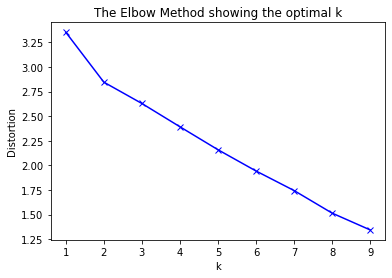

In [1672]:
# Plot the elbow
plt.plot(K, distortions_euclidean, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In order to gain more insight, I decided to capture a Jaccard distance as well to see if that would yield a leveling off point. This did yield two large leveling off points at 6, and 8 but we will be taking 6 as our K.

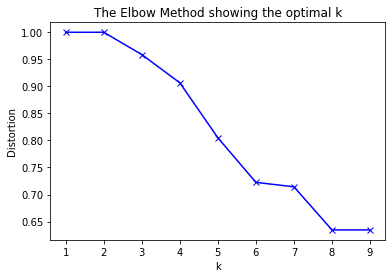

In [1673]:
# Plot the elbow
plt.plot(K, distortions_jaccard, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1674]:
k_means = KMeans(n_clusters = 6)

In [1675]:
k_means.fit(total_neighborhood_metrics)
k_means_labels = k_means.labels_
print(k_means.labels_)

[4 0 2 2 0 4 2 1 3 0 4 0 0 2 2 0 4 2 4 5 0 2 0 2 4 2]


Now we perform our K means on 6 clusters and add our labels to our total table.

In [1676]:
total_neighborhood_metrics['Group Number'] = k_means.labels_
total_neighborhood_metrics.head()

,Count of Offenses,Graduation Rate %,College Readiness,Enrollment,Fun Activities/ Venues,food(Restaurant),food(sweets and coffee),medical,night life,pertaining to transit,religion,services,shopping(food),shopping(goods),Group Number
Allston,1817.0,44.0,0.0,33.0,4.0,9.0,5.0,5.0,4.0,11.0,0.0,15.0,4.0,11.0,4
Back Bay,2715.0,51.5,0.0,318.0,3.0,20.0,4.0,2.0,4.0,4.0,0.0,21.0,2.0,17.0,0
Bay Village,151.0,85.0,34.1,218.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,2
Beacon Hill,560.0,0.0,0.0,0.0,8.0,6.0,4.0,1.0,4.0,2.0,1.0,9.0,0.0,16.0,2
Brighton,2474.0,70.0,3.9,461.0,2.0,9.0,3.0,2.0,5.0,1.0,2.0,6.0,1.0,3.0,0


In [1764]:
#We need to reset the index to allow for the mapping to happen
total_neighborhood_metrics = total_neighborhood_metrics.reset_index()
total_neighborhood_metrics

,level_0,index,Count of Offenses,Graduation Rate %,College Readiness,Enrollment,Fun Activities/ Venues,food(Restaurant),food(sweets and coffee),medical,night life,pertaining to transit,religion,services,shopping(food),shopping(goods),Group Number
0,0,Allston,1817.0,44.0,0.0,33.0,4.0,9.0,5.0,5.0,4.0,11.0,0.0,15.0,4.0,11.0,4
1,1,Back Bay,2715.0,51.5,0.0,318.0,3.0,20.0,4.0,2.0,4.0,4.0,0.0,21.0,2.0,17.0,0
2,2,Bay Village,151.0,85.0,34.1,218.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,2
3,3,Beacon Hill,560.0,0.0,0.0,0.0,8.0,6.0,4.0,1.0,4.0,2.0,1.0,9.0,0.0,16.0,2
4,4,Brighton,2474.0,70.0,3.9,461.0,2.0,9.0,3.0,2.0,5.0,1.0,2.0,6.0,1.0,3.0,0
5,5,Charlestown,1312.0,55.0,20.9,867.0,23.0,13.0,8.0,3.0,6.0,9.0,2.0,17.0,1.0,7.0,4
6,6,Chinatown,566.0,0.0,0.0,0.0,2.0,21.0,7.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0,2
7,7,Dorchester,16642.0,69.4,13.8,428.2,17.0,37.0,8.0,3.0,4.0,11.0,8.0,34.0,13.0,25.0,1
8,8,Downtown,4857.0,0.0,0.0,0.0,20.0,33.0,12.0,9.0,16.0,13.0,1.0,21.0,2.0,6.0,3
9,9,East Boston,2709.0,75.0,19.1,1480.0,16.0,27.0,3.0,2.0,10.0,22.0,5.0,20.0,9.0,4.0,0


In [1769]:
geo = f'http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson'
bin_range = [range(1, 6, 1)] 

boston_grouped = folium.Map(location=[42.329143, -71.076449], zoom_start=12)

boston_grouped.choropleth(
    geo_data=geo,
    name='choropleth',
    data=total_neighborhood_metrics,
    columns=['index','Group Number'],
    key_on='feature.properties.Name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=[1,2,3,4,5,6],
    legend_name='Group Number'
)


boston_grouped

## 4. Discussion <a name="discussion"></a>

We now finally have a complete image of how our neighborhoods relate to each other. Now to be clear, these numbers in no way associate closeness to one another. That is to say if something was labeled a 2, it would not necessarily be closely related to a 1 or a 3. These are just groupings to show that anything within a group is similar to other things within that group. More analysis would need to be done to see to what magnitude these neighborhoods were related they were. I think I've covered a lot of the short comings of the methodology used to generate this map, but I think it is worth repeating. This project is merely a framework from which to build to gain a more accurate picture. For school data, you would probably want more metrics than what was provided. The crime data could probably have been broken down into more granular categories, and the venue data could be more carefully vetted to allow more unique venues to shine through.

With all of that said I think this is a very interesting look at which neighborhoods relate to one another. We can see that a lot of neighborhoods are related in proximity to one another, but it is interesting to see how you can get collections or pockets of similarity. I think that is what a normal person might guess based on an understanding of how most cities behave, but it is interesting to see it visually.It is also interesting to see how in the example of Dorchester and Roxbury that they don't relate to any other neighborhood. They are unique in their characteristics based on this data set.

To circle back to the original purpose of this project, I think it is worth looking at one example. If you have been to Boston, then you have probably visited the Back Bay region. This is where the most wealthy people in the city live. It's right next to all the trendy shopping and dining places. This of course comes with a gigantic real estate price tag. With this information we can see just how many neighborhoods contain similar characteristics to it. One note-able example is East Boston. East Boston real estate is significantly cheaper.This comparison was suppose to be able to draw insights on finding similar neighborhoods that were cheaper but contained major elements that would be of interest to a home buyer. I think from this example we can reasonably assert we achieved our goal.


## 5. Conclusion <a name="Conclusion"></a>

This project has a lot of components to it. There are a wide variety of data sources, each with their own considerations and complications. With all of that data collected, organized, and analyized I think we were able to provide a valuable foundation for real estate insights. 

We were able to capture our most recent crime data; we scraped education data from news websites; we diligantly searched for all of the unique things that make of the neighborhoods with the foursquare API. After all of that we performed Kmeans clustering on our data and remapped it over Boston with these groupings.

Through all of our manuplations we gained insight on to the relationship that each neighborhood has to others within the bounds of Boston. This insigh could be very valuable for quick decision making for a home buyer or real estate agent alike.